In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-social-media-dataset/Social Meida Dataset.xlsx


In [2]:
import pandas as pd

df=pd.read_excel('/kaggle/input/impact-of-social-media-dataset/Social Meida Dataset.xlsx')
df.head()

,Consumer ID,Customer Name,Age,Gender,Income (USD),Education Level,Social Media Usage (Hours/Day),Social Media Platforms,Influence Level,Purchase Decision,Product Category,Specific Product,Amount Spent (USD),Brand Name,City
0,1,Alice Johnson,28,Female,45000,Bachelor's,2.5,"Instagram, Twitter",Very Influential,Yes,Fashion,Dress,200,"Nike, Zara",New York
1,2,Bob Smith,35,Male,60000,Master's,1.8,"Facebook, Instagram",Somewhat Influential,Yes,Electronics,Smartphone,800,"Apple, Samsung",Los Angeles
2,3,Chris Taylor,22,Non-binary,32000,High School,4.0,"TikTok, Snapchat",Not Influential,No,NaN,NaN,0,NaN,Chicago
3,4,David Brown,40,Male,75000,PhD,3.2,"Facebook, LinkedIn",Very Influential,Yes,Food,Burger,50,McDonald's,Houston
4,5,Emily White,29,Female,55000,Bachelor's,2.0,"Instagram, TikTok",Somewhat Influential,Yes,Beauty,Makeup,100,Sephora,Miami


In [3]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values
df = df.dropna()

# Convert categorical columns to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Purchase Decision'] = df['Purchase Decision'].map({'Yes': 1, 'No': 0})
df['Influence Level'] = df['Influence Level'].map({'Not Influential': 0, 'Somewhat Influential': 1, 'Very Influential': 2})

# Display the cleaned data
df.head()

,Consumer ID,Customer Name,Age,Gender,Income (USD),Education Level,Social Media Usage (Hours/Day),Social Media Platforms,Influence Level,Purchase Decision,Product Category,Specific Product,Amount Spent (USD),Brand Name,City
0,1,Alice Johnson,28,1,45000,Bachelor's,2.5,"Instagram, Twitter",2,1,Fashion,Dress,200,"Nike, Zara",New York
1,2,Bob Smith,35,0,60000,Master's,1.8,"Facebook, Instagram",1,1,Electronics,Smartphone,800,"Apple, Samsung",Los Angeles
3,4,David Brown,40,0,75000,PhD,3.2,"Facebook, LinkedIn",2,1,Food,Burger,50,McDonald's,Houston
4,5,Emily White,29,1,55000,Bachelor's,2.0,"Instagram, TikTok",1,1,Beauty,Makeup,100,Sephora,Miami
5,6,Frank Davis,45,0,80000,Bachelor's,3.5,"Twitter, LinkedIn",2,1,Electronics,TV,600,Samsung,San Francisco


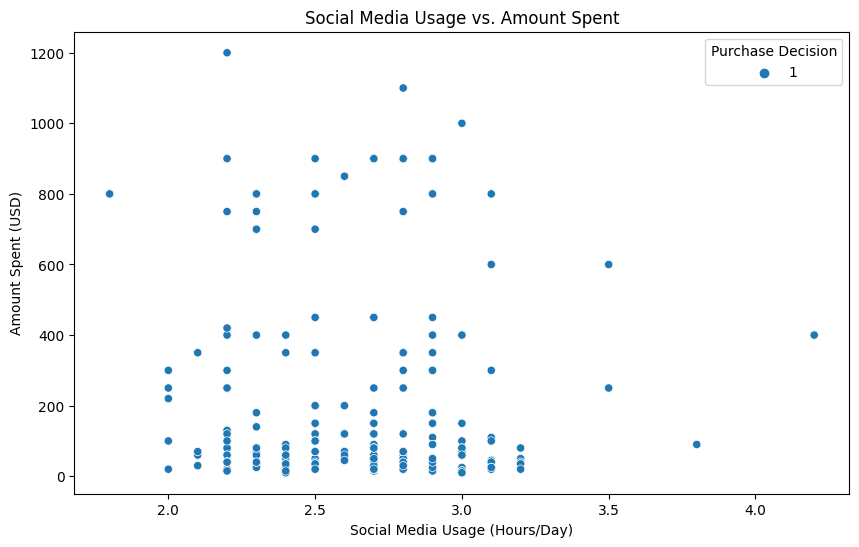

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Relationship between social media usage and amount spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social Media Usage (Hours/Day)', y='Amount Spent (USD)', hue='Purchase Decision', data=df)
plt.title('Social Media Usage vs. Amount Spent')
plt.xlabel('Social Media Usage (Hours/Day)')
plt.ylabel('Amount Spent (USD)')
plt.show()

In [5]:
from textblob import TextBlob

#Example text data
texts = ['I love this product!', 'This is the worst product I have ever bought.', 'Amazing quality and service.']

#Sentiment analysis
sentiments = [TextBlob(text).sentiment.polarity for text in texts]

#Results
for text, sentiment in zip(texts, sentiments):
    print(f'Text: {text}\nSentiment: {sentiment}\n')


Text: I love this product!
Sentiment: 0.625

Text: This is the worst product I have ever bought.
Sentiment: -1.0

Text: Amazing quality and service.
Sentiment: 0.6000000000000001



In [6]:
import numpy as np
from scipy.stats import pearsonr

# Correlation between social media usage and amount spent
correlation, _ = pearsonr(df['Social Media Usage (Hours/Day)'], df['Amount Spent (USD)'])
print(f'Correlation between social media usage and amount spent: {correlation}')

Correlation between social media usage and amount spent: -0.06040806577214923


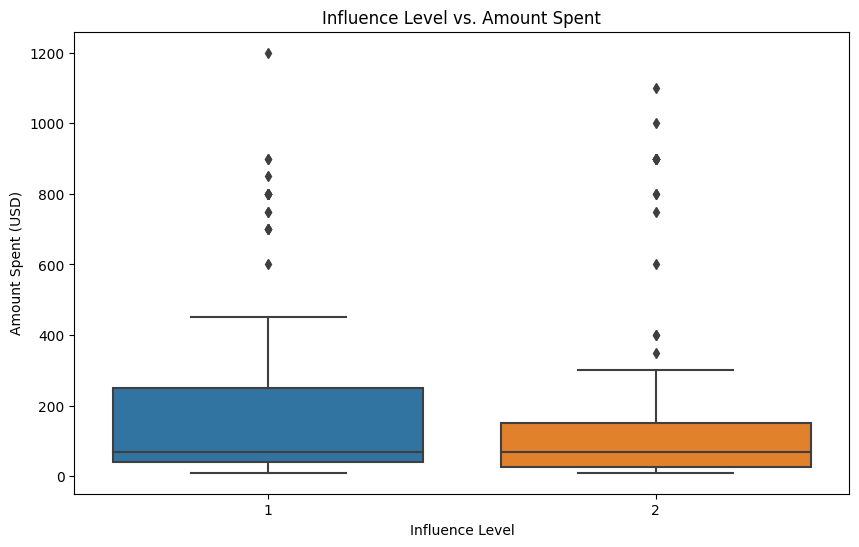

In [7]:
#Relationship between influence level and amount spent
plt.figure(figsize=(10, 6))
sns.boxplot(x='Influence Level', y='Amount Spent (USD)', data=df)
plt.title('Influence Level vs. Amount Spent')
plt.xlabel('Influence Level')
plt.ylabel('Amount Spent (USD)')
plt.show()

In [8]:
# Recommendations based on analysis

recommendations = """
1. Increase social media presence on platforms where users spend more time.
2. Partner with very influential users to promote products.
3. Create engaging content that resonates with target audiences.
4. Use targeted ads to reach consumers interested in specific product categories.
5. Monitor and respond to customer feedback on social media to improve brand reputation.
"""

print(recommendations)


1. Increase social media presence on platforms where users spend more time.
2. Partner with very influential users to promote products.
3. Create engaging content that resonates with target audiences.
4. Use targeted ads to reach consumers interested in specific product categories.
5. Monitor and respond to customer feedback on social media to improve brand reputation.

